In [0]:
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import pandas as pd

storage_account_name = "stgolistmigration"
account_key = ""

spark.conf.set(
    f"fs.azure.account.key.{storage_account_name}.dfs.core.windows.net",
    account_key
)

def get_gold_path(table):
    return f"abfss://gold@{storage_account_name}.dfs.core.windows.net/{table}/"

print("✅ Ready to visualize!")


✅ Ready to visualize!


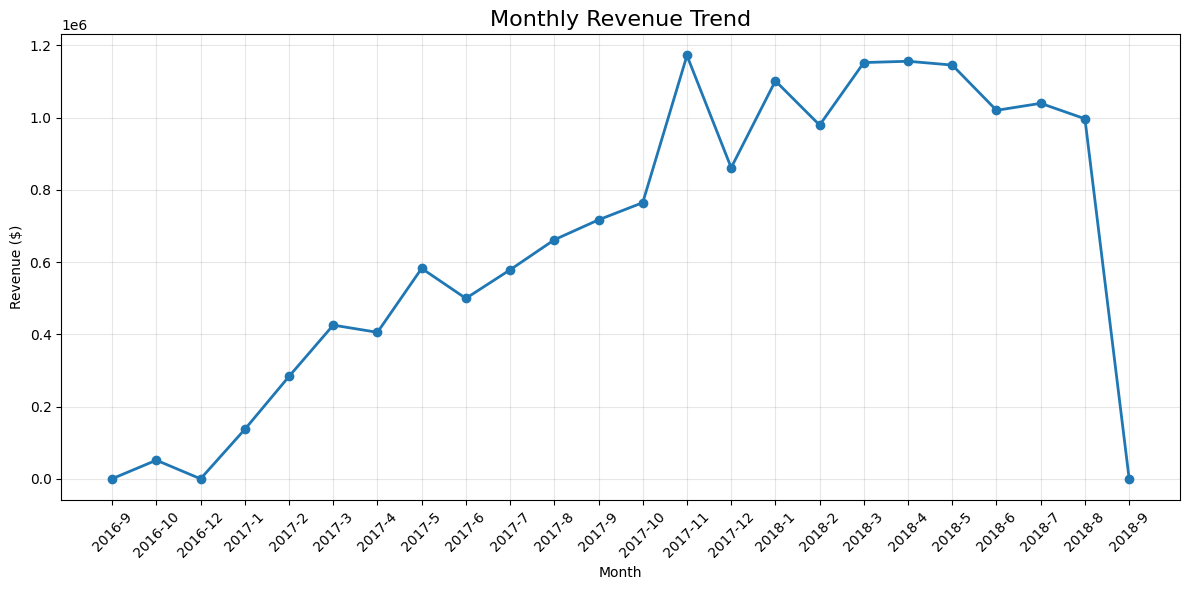

💰 Total Revenue: $15,735,512.91
📈 Avg Monthly Revenue: $655,646.37


In [0]:
# Load monthly sales
df_monthly = spark.read.format("delta").load(get_gold_path("mart_monthly_sales")).toPandas()

# Plot revenue trend
plt.figure(figsize=(12, 6))
plt.plot(df_monthly['order_year'].astype(str) + '-' + df_monthly['order_month'].astype(str), 
         df_monthly['total_revenue'], marker='o', linewidth=2)
plt.title('Monthly Revenue Trend', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"💰 Total Revenue: ${df_monthly['total_revenue'].sum():,.2f}")
print(f"📈 Avg Monthly Revenue: ${df_monthly['total_revenue'].mean():,.2f}")


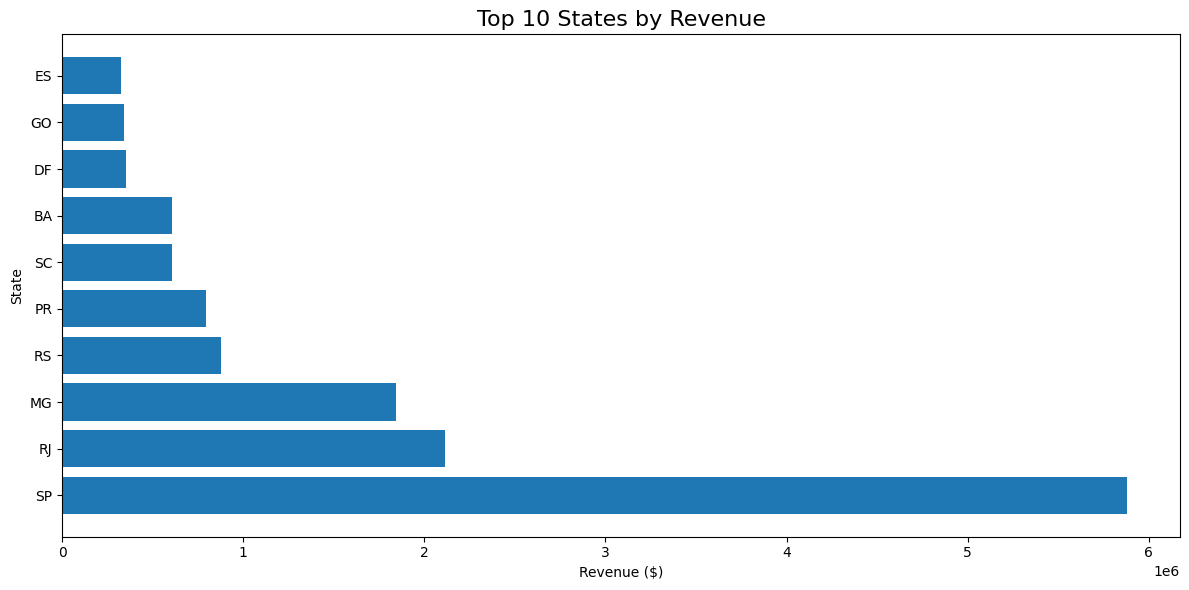

🏆 Top State: SP ($5,878,025.64)


In [0]:
# Load state performance
df_states = spark.read.format("delta").load(get_gold_path("mart_state_performance")).toPandas()

# Top 10 states
top_states = df_states.nlargest(10, 'total_revenue')

plt.figure(figsize=(12, 6))
plt.barh(top_states['customer_state'], top_states['total_revenue'])
plt.title('Top 10 States by Revenue', fontsize=16)
plt.xlabel('Revenue ($)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

print(f"🏆 Top State: {top_states.iloc[0]['customer_state']} (${top_states.iloc[0]['total_revenue']:,.2f})")


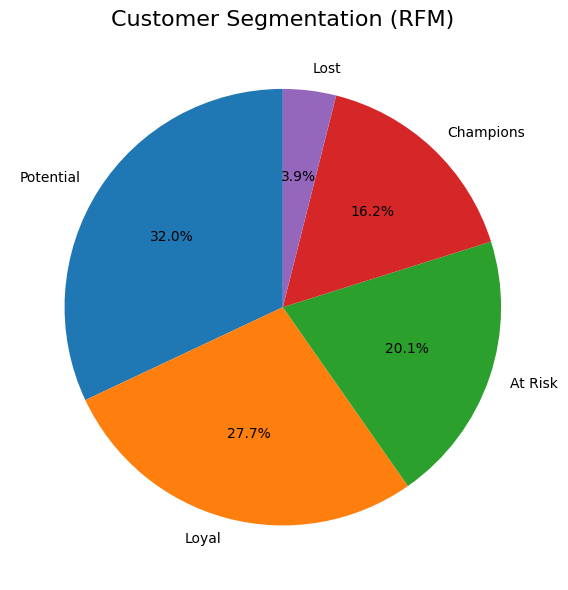


🎯 Customer Distribution:
Potential    31421
Loyal        27217
At Risk      19783
Champions    15922
Lost          3857
Name: customer_segment, dtype: int64


In [0]:
# Load customer segments
df_segments = spark.read.format("delta").load(get_gold_path("mart_customer_segments")).toPandas()

segment_counts = df_segments['customer_segment'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Customer Segmentation (RFM)', fontsize=16)
plt.tight_layout()
plt.show()

print("\n🎯 Customer Distribution:")
print(segment_counts)


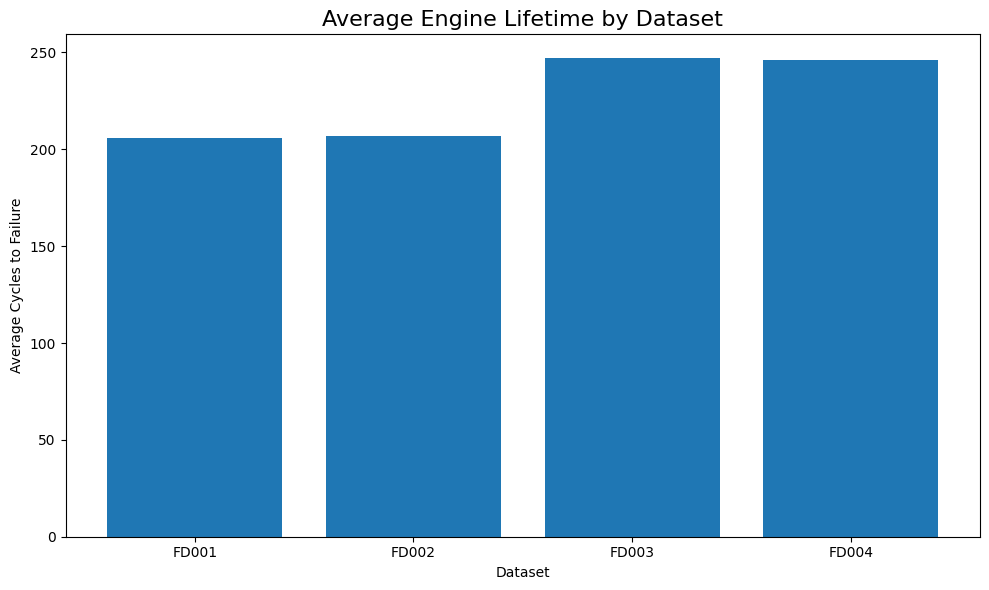


🚀 NASA Engine Health Summary:
  dataset_name  engine_count  avg_lifetime_cycles
0        FD001           100                206.0
1        FD002           260                207.0
2        FD003           100                247.0
3        FD004           249                246.0


In [0]:
# Load NASA engine data
df_nasa = spark.read.format("delta").load(get_gold_path("mart_engine_degradation")).toPandas()

plt.figure(figsize=(10, 6))
plt.bar(df_nasa['dataset_name'], df_nasa['avg_lifetime_cycles'])
plt.title('Average Engine Lifetime by Dataset', fontsize=16)
plt.xlabel('Dataset')
plt.ylabel('Average Cycles to Failure')
plt.tight_layout()
plt.show()

print("\n🚀 NASA Engine Health Summary:")
print(df_nasa[['dataset_name', 'engine_count', 'avg_lifetime_cycles']])


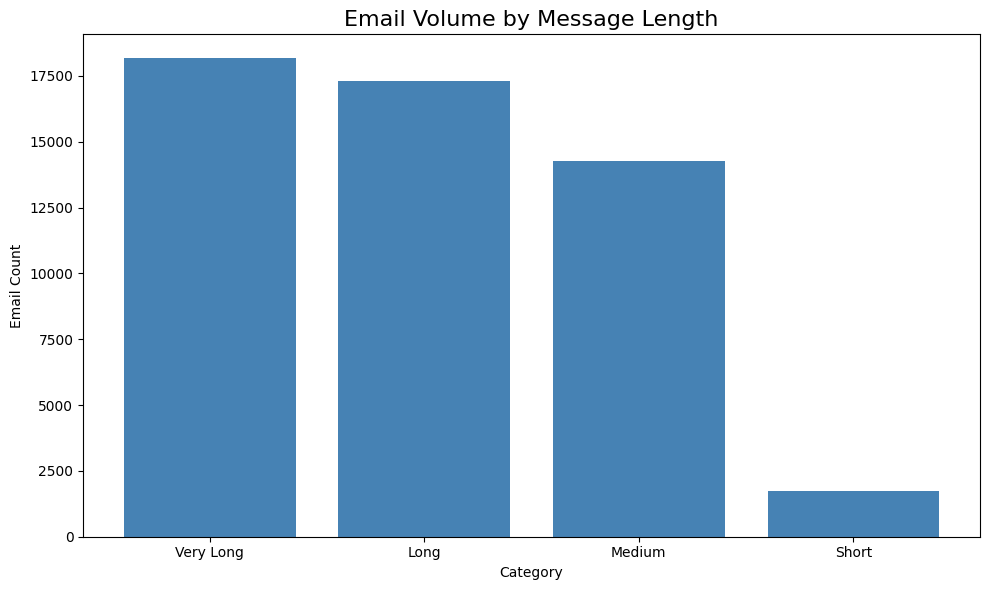


📧 Enron Email Distribution:
  message_category  email_count  pct_of_total
0        Very Long        18173         35.27
1             Long        17314         33.61
2           Medium        14286         27.73
3            Short         1749          3.39


In [0]:
# Load email patterns
df_emails = spark.read.format("delta").load(get_gold_path("mart_email_patterns")).toPandas()

plt.figure(figsize=(10, 6))
plt.bar(df_emails['message_category'], df_emails['email_count'], color='steelblue')
plt.title('Email Volume by Message Length', fontsize=16)
plt.xlabel('Category')
plt.ylabel('Email Count')
plt.tight_layout()
plt.show()

print("\n📧 Enron Email Distribution:")
print(df_emails[['message_category', 'email_count', 'pct_of_total']])
